# CEDIT CARD FRAUD DETECTION 

#importing required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing our dataset
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#checking the missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#no. of Correct and fraud transaction 
df["Class"].value_counts()
#0 means correct transaction
#1 means fraud transaction

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#seaprating the legit and fraud transaction
C=df[df.Class==0]
F=df[df.Class==1]

In [10]:
#seeing legit transaction
C.shape

(284315, 31)

In [11]:
#seeing fraud transaction
F.shape

(492, 31)

In [12]:
C.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
F.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#visualizing our data set

Text(0.5, 1.0, 'Distribution of fraud and safe transaction')

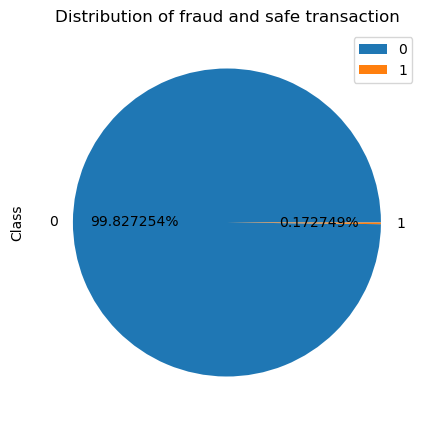

In [14]:
t=df["Class"].value_counts()
t.plot(kind="pie",autopct="%1f%%",figsize=(14,5))
plt.legend()
plt.title("Distribution of fraud and safe transaction")

<AxesSubplot:xlabel='Class', ylabel='Amount'>

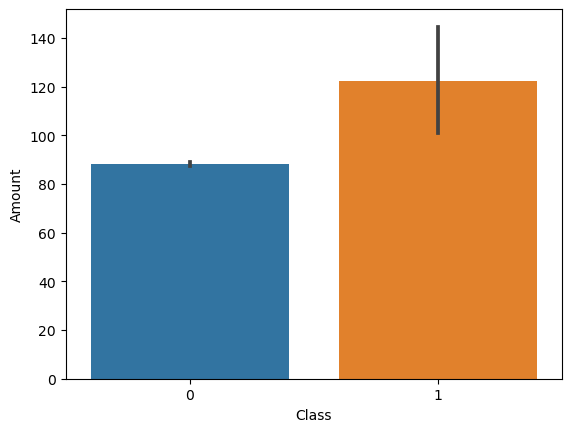

In [15]:
sns.barplot(x="Class",y="Amount",data=df)

In [16]:
#as the dataset is unbalanced so we have to balance it
#for balancing we have do undersampling
C_sample=C.sample(n=492)

In [17]:
new_df=pd.concat([C_sample,F],axis=0) 

In [18]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
129049,78933.0,1.288975,-0.502074,0.658702,-0.782778,-0.923256,-0.354476,-0.662310,0.033789,-1.160495,...,0.011054,-0.078694,0.160756,0.217242,0.119914,-0.484739,0.026014,0.014209,17.99,0
136272,81624.0,-0.324027,0.810373,2.372810,1.438842,-0.411105,-0.184065,0.311902,-0.180481,-0.206116,...,-0.056456,-0.019052,-0.194017,0.369001,0.030624,-0.263401,-0.214058,-0.206521,22.14,0
105339,69476.0,-1.012677,-0.244969,1.202026,0.478418,0.714979,-1.545375,0.684801,-0.453994,0.094862,...,0.076954,0.470990,-0.001312,0.723926,-1.052367,-0.815143,0.127776,-0.055073,105.65,0
68681,53098.0,1.090784,-0.209764,0.652044,0.527854,-0.629445,-0.035231,-0.453047,0.243224,0.260449,...,0.090030,0.149088,0.004241,0.021358,0.172669,0.360427,-0.019052,0.008808,36.95,0
85444,60776.0,1.248243,0.219085,0.537111,0.717113,0.008930,0.387755,-0.328291,0.105633,-0.020757,...,-0.072082,-0.147098,-0.109122,-0.836438,0.489659,-0.460267,0.053009,0.016916,0.00,0


In [19]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
#now we have balanced data
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of fraud and safe transaction')

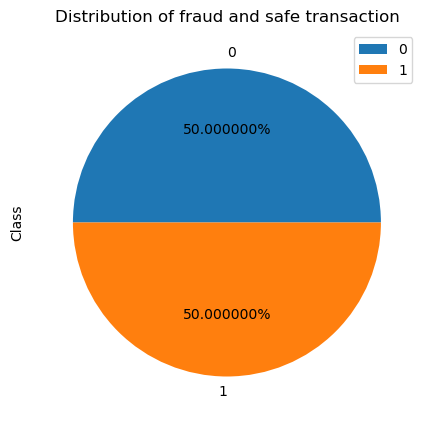

In [21]:
t=new_df["Class"].value_counts()
t.plot(kind="pie",autopct="%1f%%",figsize=(14,5))
plt.legend()
plt.title("Distribution of fraud and safe transaction")

In [22]:
#separting our dataset
X=new_df.drop(columns="Class",axis=1)
Y=new_df["Class"]
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
129049,78933.0,1.288975,-0.502074,0.658702,-0.782778,-0.923256,-0.354476,-0.662310,0.033789,-1.160495,...,0.104268,0.011054,-0.078694,0.160756,0.217242,0.119914,-0.484739,0.026014,0.014209,17.99
136272,81624.0,-0.324027,0.810373,2.372810,1.438842,-0.411105,-0.184065,0.311902,-0.180481,-0.206116,...,0.185558,-0.056456,-0.019052,-0.194017,0.369001,0.030624,-0.263401,-0.214058,-0.206521,22.14
105339,69476.0,-1.012677,-0.244969,1.202026,0.478418,0.714979,-1.545375,0.684801,-0.453994,0.094862,...,-0.330031,0.076954,0.470990,-0.001312,0.723926,-1.052367,-0.815143,0.127776,-0.055073,105.65
68681,53098.0,1.090784,-0.209764,0.652044,0.527854,-0.629445,-0.035231,-0.453047,0.243224,0.260449,...,-0.144646,0.090030,0.149088,0.004241,0.021358,0.172669,0.360427,-0.019052,0.008808,36.95
85444,60776.0,1.248243,0.219085,0.537111,0.717113,0.008930,0.387755,-0.328291,0.105633,-0.020757,...,-0.007715,-0.072082,-0.147098,-0.109122,-0.836438,0.489659,-0.460267,0.053009,0.016916,0.00


In [23]:
Y.head()

129049    0
136272    0
105339    0
68681     0
85444     0
Name: Class, dtype: int64

#spiltting our data set into train and test dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=16,stratify=Y)

#model building

In [25]:
#importing various model and the selected the best one
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
models={"Lr":LogisticRegression(),
        "knn":KNeighborsClassifier(),
        "Dt":DecisionTreeClassifier(),
        "Rf":RandomForestClassifier(),
}
names=[]
scores=[]
for name,model in models.items():
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_pred,Y_test)
    names.append(name)
    scores.append(score)

In [26]:
result=pd.DataFrame({"model":names,"score":scores})
result.sort_values(by="score",ascending=False)

,model,score
3,Rf,0.922764
0,Lr,0.918699
2,Dt,0.890244
1,knn,0.613821


#since the random forest has more accuracy hence we will use that model

In [27]:
Rf=RandomForestClassifier()
Rf.fit(X_train,Y_train)
y_pred=Rf.predict(X_test)
accuracy=accuracy_score(y_pred,Y_test)
accuracy

0.926829268292683

In [28]:
report=classification_report(Y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.93       123\n           1       0.96      0.89      0.92       123\n\n    accuracy                           0.93       246\n   macro avg       0.93      0.93      0.93       246\nweighted avg       0.93      0.93      0.93       246\n'